**Importing libraries** 


In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

**loading the Csv file**

In [154]:
df=pd.read_excel("E Commerce Dataset.xlsx")
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


**Data Handling**

In [155]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [156]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


**checking any null is present**

In [157]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [158]:
df.isna().sum()*100/len(df)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

**Filling the null value with Median value**

In [159]:
numerical_columns=['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
for columns in list(numerical_columns):
    df[columns].fillna(df[columns].median(),inplace=True )
df[columns].head()

0    159.93
1    120.90
2    120.28
3    134.07
4    129.60
Name: CashbackAmount, dtype: float64

In [160]:
df.isna().sum()*100/len(df)

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

In [161]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

**Data Handling**

In [162]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [163]:
category_mapping={'Phone':'Mobile Phone'}
df['PreferredLoginDevice']= df['PreferredLoginDevice'].replace(category_mapping)
print(df['PreferredLoginDevice'].value_counts())

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


In [164]:
df.replace({'PreferredLoginDevice':{'Mobile Phone':0,'Computer':1,'Mobile Phone':0}},inplace=True)
df['PreferredLoginDevice'].head()

0    0
1    0
2    0
3    0
4    0
Name: PreferredLoginDevice, dtype: int64

In [165]:
df["PreferredPaymentMode"].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [166]:
category_mapping={'CC':'Credit Card'}
df["PreferredPaymentMode"]= df["PreferredPaymentMode"].replace(category_mapping)
print(df["PreferredPaymentMode"].value_counts())

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64


In [167]:
category_mapping={'COD':'Cash on Delivery'}
df["PreferredPaymentMode"]= df["PreferredPaymentMode"].replace(category_mapping)
print(df["PreferredPaymentMode"].value_counts())

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64


In [168]:
df['Gender'].value_counts()


Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [169]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [170]:
category_mapping={'Mobile':'Mobile Phone'}
df['PreferedOrderCat']= df['PreferedOrderCat'].replace(category_mapping)
print(df['PreferedOrderCat'].value_counts())

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64


In [171]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

In [172]:
df["Churn"].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [175]:
categorical_features = ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

In [179]:
numerical_features = ['CustomerID'	,'Churn',	'Tenure','PreferredLoginDevice','CityTier','WarehouseToHome','Gender','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
df_features=df [numerical_features +categorical_features + ['Churn']]

df_features.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Churn
0,50001,1,4.0,0,3,6.0,Female,3.0,3,2,...,1,11.0,1.0,1.0,5.0,159.93,Debit Card,Laptop & Accessory,Single,1
1,50002,1,9.0,0,1,8.0,Male,3.0,4,3,...,1,15.0,0.0,1.0,0.0,120.90,UPI,Mobile Phone,Single,1
2,50003,1,9.0,0,1,30.0,Male,2.0,4,3,...,1,14.0,0.0,1.0,3.0,120.28,Debit Card,Mobile Phone,Single,1
3,50004,1,0.0,0,3,15.0,Male,2.0,4,5,...,0,23.0,0.0,1.0,3.0,134.07,Debit Card,Laptop & Accessory,Single,1
4,50005,1,0.0,0,1,12.0,Male,3.0,3,5,...,0,11.0,1.0,1.0,3.0,129.60,Credit Card,Mobile Phone,Single,1
5,50006,1,0.0,1,1,22.0,Female,3.0,5,5,...,1,22.0,4.0,6.0,7.0,139.19,Debit Card,Mobile Phone,Single,1
6,50007,1,9.0,0,3,11.0,Male,2.0,3,2,...,0,14.0,0.0,1.0,0.0,120.86,Cash on Delivery,Laptop & Accessory,Divorced,1
7,50008,1,9.0,0,1,6.0,Male,3.0,3,2,...,1,16.0,2.0,2.0,0.0,122.93,Credit Card,Mobile Phone,Divorced,1
8,50009,1,13.0,0,3,9.0,Male,3.0,4,3,...,1,14.0,0.0,1.0,2.0,126.83,E wallet,Mobile Phone,Divorced,1
9,50010,1,9.0,0,1,31.0,Male,2.0,5,3,...,0,12.0,1.0,1.0,1.0,122.93,Debit Card,Mobile Phone,Single,1


**Encodeing Categorical Features**

In [186]:
def encode_categorical_features(df_features):
    df_encoded = df_features.copy()
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        df_encoded[feature] = le.fit_transform(df_encoded[feature])
        label_encoders[feature] = le
        print(f"Encoded {feature}: {df_encoded[feature].unique()}")
    
    return df_encoded, label_encoders

In [194]:
df_encoded, encoders = encode_categorical_features(df_features)
print("\nCategorical features encoded successfully!")
print(f"Dataset shape: {df_encoded.shape}")

Encoded PreferredPaymentMode: [2 4 1 0 3]
Encoded PreferedOrderCat: [2 3 4 0 1]
Encoded MaritalStatus: [2 0 1]

Categorical features encoded successfully!
Dataset shape: (5630, 21)


In [196]:
segmentation_features = df[['Tenure', 'OrderCount', 'CashbackAmount', 
                           'HourSpendOnApp', 'DaySinceLastOrder', 
                           'SatisfactionScore', 'CouponUsed']].copy()


In [198]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(segmentation_features)

**K-means Clustering**

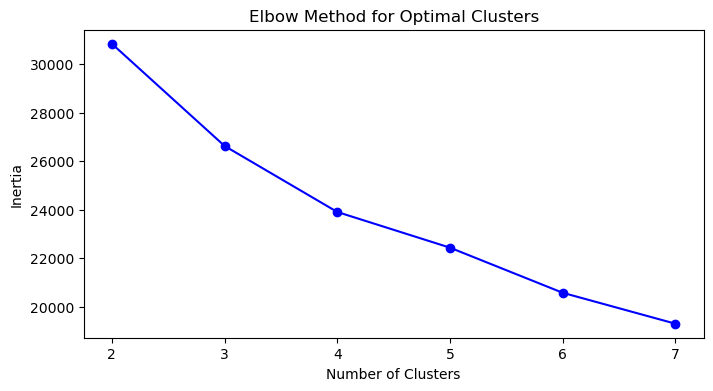

In [226]:
inertias = []
k_range = range(2, 8)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
df['Customer_Segment'] = clusters

In [201]:
if 'Churn' in df.columns:
    churn_by_segment = df.groupby('Customer_Segment')['Churn'].agg(['mean', 'count'])
    print("CHURN ANALYSIS BY SEGMENT:")
    print(churn_by_segment)

CHURN ANALYSIS BY SEGMENT:
                      mean  count
Customer_Segment                 
0                 0.173709   1917
1                 0.247138   1922
2                 0.146184    773
3                 0.026523   1018


**Business Strategy**

In [229]:
def analyze_segments(df):
    insights = {}
    for segment in df['Customer_Segment'].unique():
        segment_data = df[df['Customer_Segment'] == segment]
        profile = {
            'size': len(segment_data),
            'avg_orders': segment_data['OrderCount'].mean(),
            'avg_cashback': segment_data['CashbackAmount'].mean(),
            'avg_satisfaction': segment_data['SatisfactionScore'].mean(),
            'churn_rate': segment_data['Churn'].mean() if 'Churn' in df.columns else 0
        }
        if profile['avg_orders'] > 8 and profile['churn_rate'] < 0.1:
            strategy = "Champions: Reward & Retain"
        elif profile['avg_orders'] > 5:
            strategy = "Loyal: Upsell Premium Products"
        elif profile['churn_rate'] > 0.3:
            strategy = "At Risk: Re-engagement Campaign"
        else:
            strategy = "Potential: Nurture with Offers" 
        profile['strategy'] = strategy
        insights[f'Segment_{segment}'] = profile
    return insights
segment_insights = analyze_segments(df)
for segment, data in segment_insights.items():
    print(f"\n{segment.upper()}:")
    print(f"Size: {data['size']} customers")
    print(f"Strategy: {data['strategy']}")
    print(f"Avg Orders: {data['avg_orders']:.1f}")
    print(f"Churn Rate: {data['churn_rate']:.1%}")


SEGMENT_0:
Size: 1917 customers
Strategy: Potential: Nurture with Offers
Avg Orders: 1.7
Churn Rate: 17.4%

SEGMENT_1:
Size: 1922 customers
Strategy: Potential: Nurture with Offers
Avg Orders: 2.2
Churn Rate: 24.7%

SEGMENT_2:
Size: 773 customers
Strategy: Loyal: Upsell Premium Products
Avg Orders: 8.7
Churn Rate: 14.6%

SEGMENT_3:
Size: 1018 customers
Strategy: Potential: Nurture with Offers
Avg Orders: 2.5
Churn Rate: 2.7%


**integration to power BI**

In [204]:
powerbi_data = df[['CustomerID', 'Customer_Segment', 'Tenure', 'OrderCount', 
                   'CashbackAmount', 'SatisfactionScore', 'Churn']].copy()
segment_names = {0: 'Champions', 1: 'Loyal', 2: 'At Risk', 3: 'Potential'}
powerbi_data['Segment_Name'] = powerbi_data['Customer_Segment'].map(segment_names)
powerbi_data.to_csv('customer_segments_powerbi.csv', index=False)
print("Data exported for Power BI: customer_segments_powerbi.csv")


Data exported for Power BI: customer_segments_powerbi.csv
